# Understanding Police Shootings in America

### Project Goal:
  The purpose for this project is to create a generalized pattern that will enhance our understanding of the relations of race, gun violence and police shootings in the United States through Data Science statistical analysis. 

__Data Period:__  JAN 02, 2015 to JUN 13, 2020

__Data Source:__ 
    https://www.kaggle.com/code/gauravduttakiit/understanding-us-police-shootings/data?select=shootings.csv

  Police Shootings in America has gained much unanticipated media coverage lately and for the most part has sparked outrage among global populations and more so United States. According to ..............

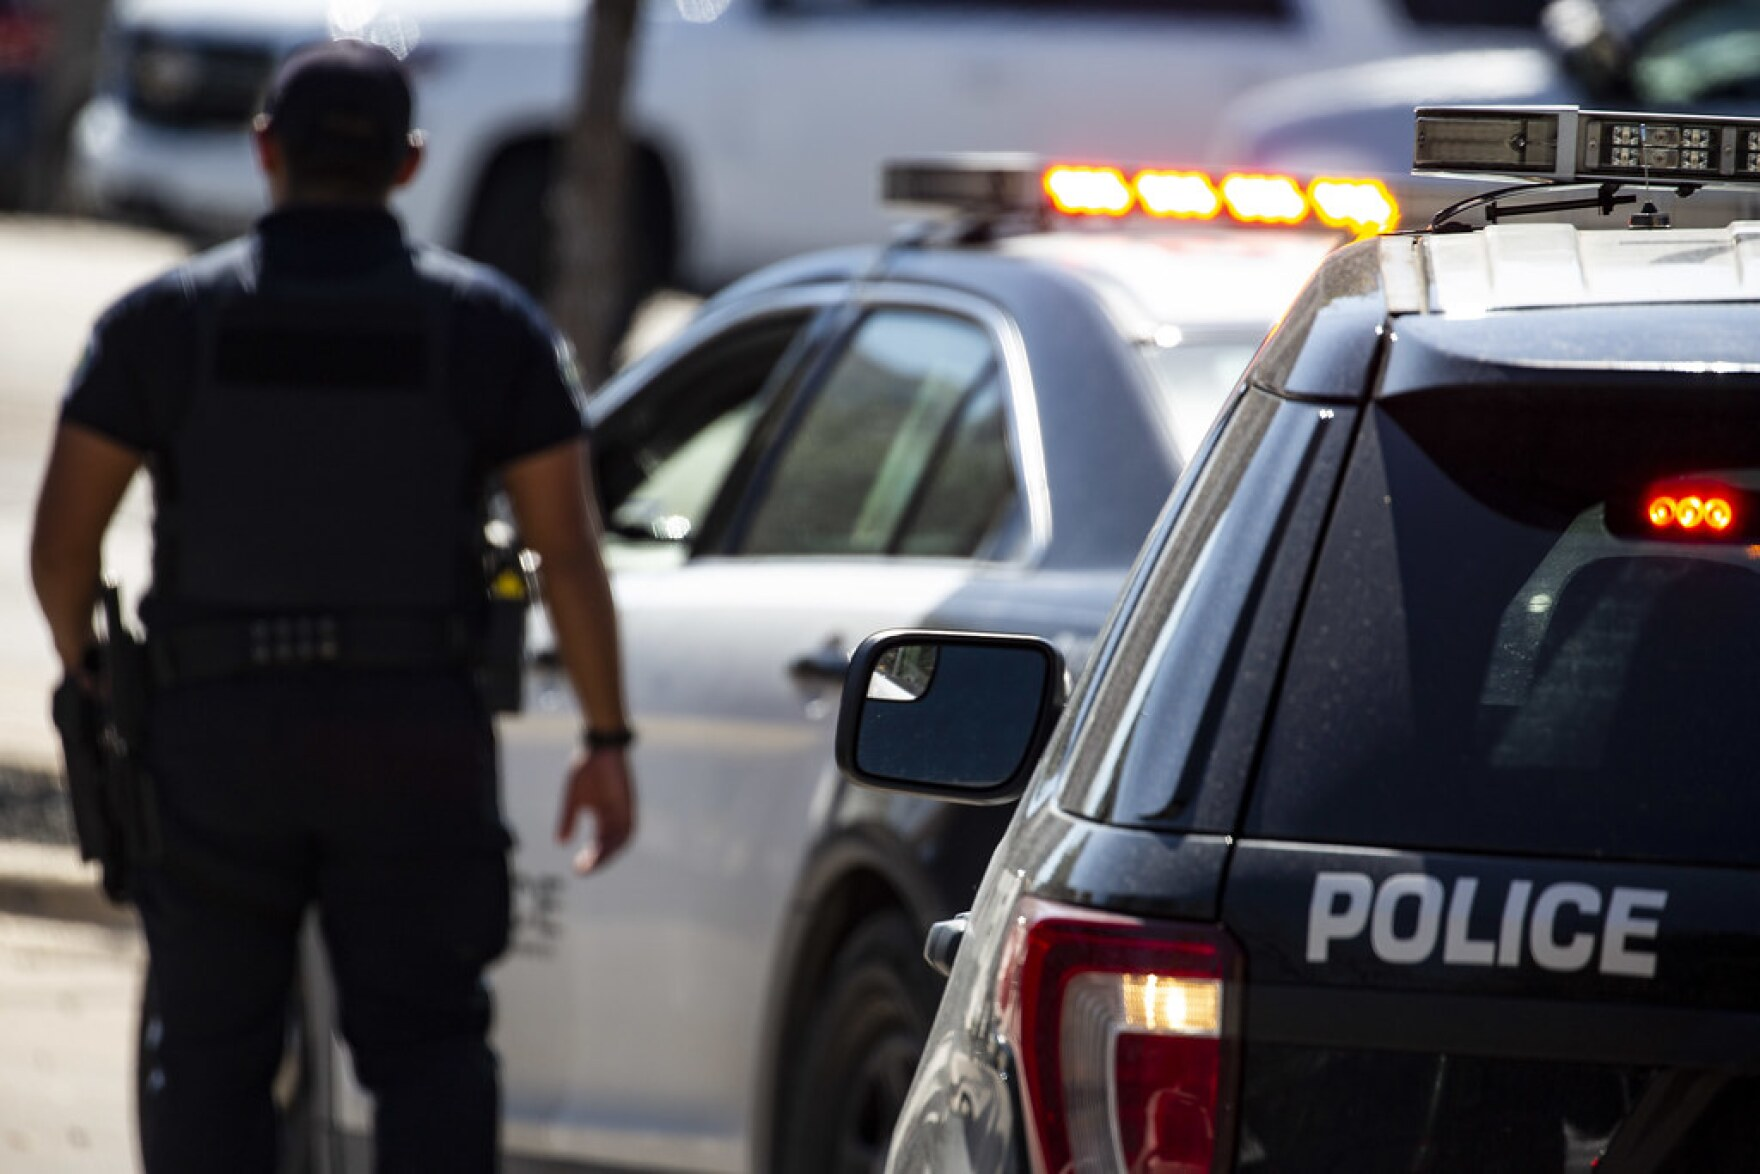

In [21]:
from IPython import display
display.Image("./police.jpeg")

#### Import Libraries

In [5]:
# Import required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from acquire import get_police_shootings_data
from prepare import prepare_police_shootings_data, prepare_modeling_data
from sklearn.model_selection import train_test_split

# Stats libraries
import statsmodels.api as sm
import scipy.stats as stats


# plotting defaults
plt.rc('figure', figsize=(13, 5))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set alpha /confidence level 
alpha = 0.05

# Planning 
Understand the project requirements and rubric as outlined in Code-Up Curriculum.

Stakeholders: Public, understand police shootings in the United States.
##### Timeline:
Day 1: 
   - 1 Hour - Select a dataset / project to work on
   - 1 Hour - Project Planning
   - 2 hours - Data Acquired and Prepped
   - 2.5 hours - Initial EDA
   
Day 2:
   - 1 hour - Summarize your findings, perform next steps indicated from exploration, and wrap up any work needed prior to modeling.
   - 2 hours - Modeling
   - 2.5 hours - Iteration 2
   - 1 hour - Prepare to deliver
   
Day 3:
   - Further MVP Iteration
   - Project Summary/Write-up
Day 4:
   - Peer Review

# Acquire Data

  Data acquired from open-source website www.kaggle.com through the link https://www.kaggle.com/code/gauravduttakiit/understanding-us-police-shootings/data?select=shootings.csv. A comma separated was directly downloaded from the Internet and saved on local machine under 'shootings.csv' file. Should you wish to replicate this project, get a copy through discussed method and save a copy to your local computer. In the future, I do intent to implement automated function that will download the file when called from this phase of the pipeline. Specific module responsible for saving the file is called acquire.py and had a user-built module called 'get_police_shootings_data'. 

In [7]:
train, validate, test = prepare_police_shootings_data()
train.shape, validate.shape, test.shape

((2739, 27), (1175, 27), (979, 27))

# Prepare Data

  This project has the 'prepare.py' are necessary in the data preparations prior to exploration phase. Functions contained in this modules are:
  - 'encode_data()' that takes in a df and encodes necessary categorical columns numeric values for analysis. 
  - 'prepare_police_shootings_data()'. This function is responsible for:
      - Acquiring data-frame from acquire.py module 
      - Drop unnecessary columns 'id' & 'name'. (Suspects names maybe important on other situations but for purpose of this project, race was major importance).
      - Drop any duplicated rows of data.
      - Reset main data-frame index. 
      - Create new columns such as date with month, year, day, week, quoter and gun_violence. 
      - The function calls the encode function to impute categorical data into numerical.
      - Set date column into date-time format and index it.
      - Since the data-frame contained no null values, any nulls that are created will be filled with value 1.
      - Lastly, the function created split of train, validate, and test according to the following ratios:
          - Train: 55%
          - Validate: 24%
          - Test: 20%

# Explore Data

# Modeling 

# Delivery